## Import libs

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from wordcloud import WordCloud

%matplotlib inline

## Ảnh hưởng của tiền xử lý tới dữ liệu

### Kích thước vocab

Sau khi tiến hành tiền xử lý dữ liệu qua các bước như:
- Loại bỏ những thẻ HTML còn dư
- Chuyển chữ thành dạng viết thường
- Tokenize words
- Loại bỏ ký tự đặc biệt
- Loại bỏ stopwords và những từ hiếm xuất hiện

Thì kích thước của vocab đã giảm đi rõ rệt, chúng ta có thể đánh giá như sau:

In [7]:
# Với dữ liệu cũ
data_dir = './data'
data_files = os.listdir(data_dir)
df_list = []
for file in data_files:
    df_list.append(pd.read_csv(data_dir + '/' + file))
    
df1 = pd.concat(df_list, ignore_index=True)
df1 = df1[['name', 'introduction', 'topic']]
df1 = df1.dropna()
vocab = set()
for doc in (list(df1['name'].values) + list(df1['introduction'].values)):
    words = doc.split(' ')
    for word in words:
        if word not in vocab:
            vocab.add(word)
            
print('Kích thước của vocab trước khi tiền xử lý: ', len(vocab))

Kích thước của vocab trước khi tiền xử lý:  121490


In [8]:
# Với dữ liệu mới
df2 = pd.read_csv('./preprocessed_data/preprocessed_data.csv')
df2 = df2['inputs']
new_vocab = set()
for doc in df2.values:
    words = doc.split(' ')
    for word in words:
        if word not in new_vocab:
            new_vocab.add(word)
            
print('Kích thước của vocab sau khi tiền xử lý: ', len(new_vocab))

Kích thước của vocab sau khi tiền xử lý:  29701


**Kết luận:** Như vậy, kích thước của tập vocab đã giảm xuống xấp xỉ 4 lần, điều này đồng nghĩa với việc số chiều dữ liệu đã giảm xuống rất nhiều và không gian dữ liệu đã được thu hẹp lại rất đáng kể.

### Độ dài trung bình của mỗi mẫu
Không chỉ là số lượng từ trong vocab mà số lượng từ trong mỗi datapoint cũng đã được giảm đi một cách đáng kể

In [9]:
# Với dữ liệu cũ
df1 = df1.values
data_sizes = []
for i in range(len(df1)):
    data_sizes.append(len(df1[i, 0].split(' ')) * 2 + len(df1[i, 1].split(' ')))

In [10]:
# độ dài trung bình cho 1 datapoint
print('Độ dài trung bình: ', np.mean(np.array(data_sizes)))

Độ dài trung bình:  545.9234904363045


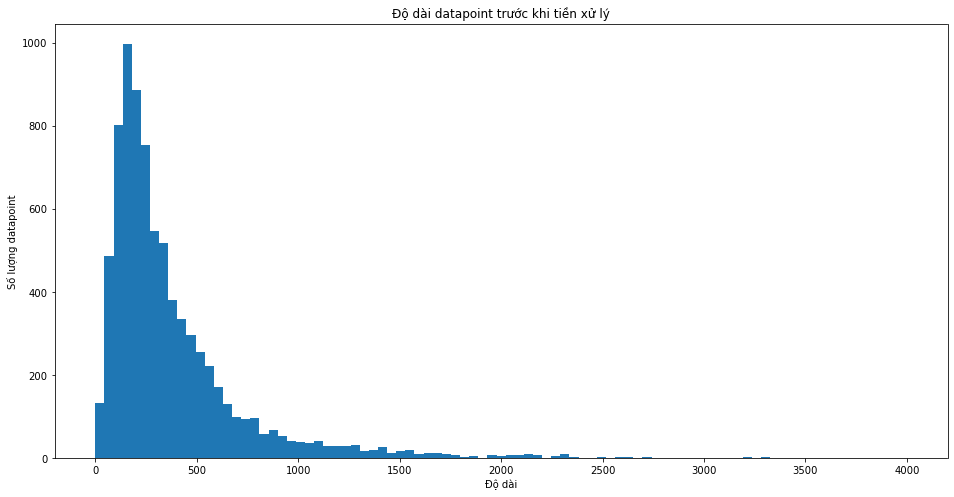

In [11]:
# vẽ histogram độ dài của các datapoint
plt.figure(figsize=(16, 8))
plt.title("Độ dài datapoint trước khi tiền xử lý")
plt.xlabel('Độ dài')
plt.ylabel('Số lượng datapoint')
if not os.path.exists('./images'):
    os.mkdir('./images')
plt.hist(np.array(data_sizes), bins=int(math.sqrt(len(data_sizes))), range=(0, 4000))
plt.savefig('./images/dataset_before_preprocess.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Phần lớn các datapoint có độ dài dao động từ 0 cho đến 2000 từ và độ dài trung bình cho một datapoint là hơn 500 từ.

In [12]:
# Với dữ liệu đã qua tiền xử lý
df2 = df2.values
new_data_sizes = []
for doc in df2:
    new_data_sizes.append(len(doc.split(' ')))

In [13]:
# Độ dài trung bình của mỗi mẫu dữ liệu
print('Độ dài trung bình của datapoint: ', np.mean(np.array(new_data_sizes)))

Độ dài trung bình của datapoint:  246.19927490936368


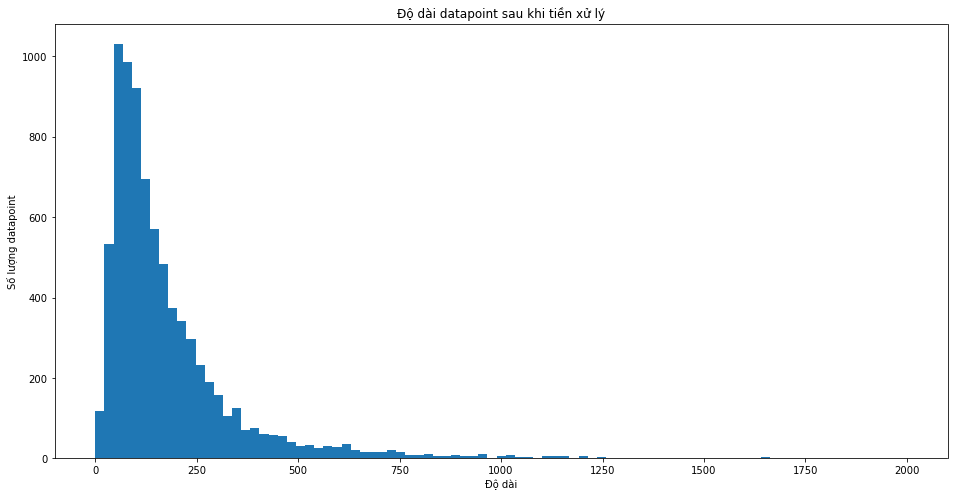

In [14]:
# vẽ histogram cho dataset
plt.figure(figsize=(16, 8))
plt.title("Độ dài datapoint sau khi tiền xử lý")
plt.xlabel('Độ dài')
plt.ylabel('Số lượng datapoint')
a = plt.hist(np.array(new_data_sizes), bins=int(math.sqrt(len(new_data_sizes))), range=(0, 2000))
plt.savefig('./images/dataset_after_preprocess.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Như vậy, phần lớn datapoint bây giờ chỉ có độ dài không quá 1000 từ và độ dài trung bình cho mỗi mẫu cũng đã giảm xuống khoảng 1 nửa.

## Phân tích dữ liệu

### Độ dài của các datapoint
Như đã đề cập ở phần trên thì độ dài trung bình cho một datapoint là khoảng 250 từ và phần lớn datapoint có độ dài không vượt quá 1000 từ

### Phân bố của các nhãn trên tập dữ liệu

In [15]:
df = pd.read_csv('./preprocessed_data/preprocessed_data.csv')
data = df.values

# Danh sách nhãn
labels = list(set(data[:, 2]))
labels = sorted(labels)
print('Danh sách nhãn: ')
for label in labels:
    print('\t', label)
    
print('Số lượng nhãn: ', len(labels))

Danh sách nhãn: 
	 am-nhac-1
	 chinh-tri-triet-hoc
	 du-lich-1
	 khoa-hoc-co-ban
	 khoa-hoc-ky-thuat
	 khoa-hoc-tu-nhien-xa-hoi
	 lich-su-dia-ly
	 my-thuat-kien-truc
	 nghiep-vu-bao-chi
	 nong-lam-nghiep
	 phap-luat-1
	 sach-hoc-nghe
	 sach-ton-giao
	 the-thao
	 van-hoa-nghe-thuat
	 y-hoc
Số lượng nhãn:  16


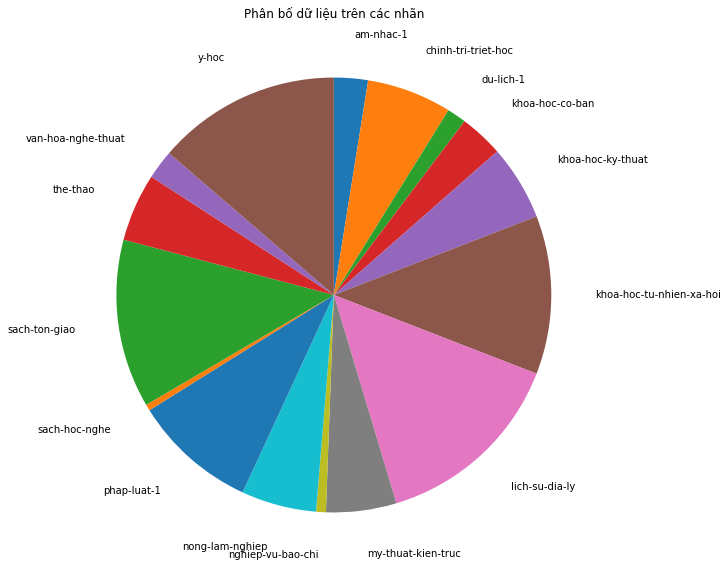

In [16]:
# kích thước của mỗi nhãn
sizes = []
for label in labels:
    sizes.append(data[np.where(data[:, 2] == label)].shape[0])
    
S = sum(sizes)
sizes = [s/S for s in sizes]
plt.figure(figsize=(10, 10))
plt.title('Phân bố dữ liệu trên các nhãn')
plt.pie(sizes, labels=labels, startangle=90, counterclock=False, labeldistance=1.2)
plt.savefig('./images/label_distribution.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

**Nhận xét:** Dữ liệu phân bố không đều, có nhãn nhiều nhãn có kích thước rất bé như *sach-hoc-nghe* hay *nghiep-vu-bao-chi* có kích thước rất nhỏ, trong khi có nhiều nhãn có kích thước rất lớn như *y-hoc*, *lich-su-dia-ly*, ... Điều này đòi hỏi phải chia tập train và test cho phù hợp.

### Độ phổ biến của các từ trong một nhãn
Ví dụ với nhãn y-hoc, ta có thể đánh giá được sơ bộ phân phối của các từ trong một nhãn.

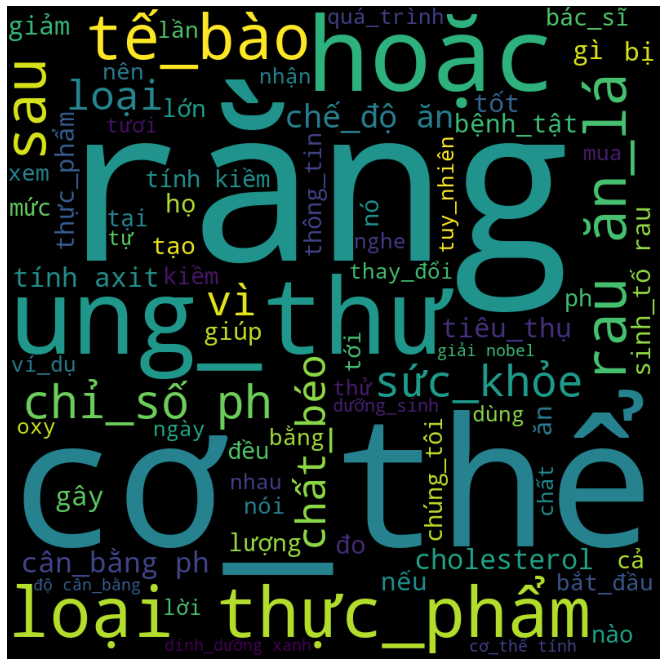

In [17]:
# Vẽ biểu đồ Word cloud cho label y-hoc
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000, min_font_size=20).generate(str(data[np.where(data[:, 2] == 'y-hoc')][:, 1]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./images/word_distribution_1.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Ví dụ với nhãn phap-luat-1

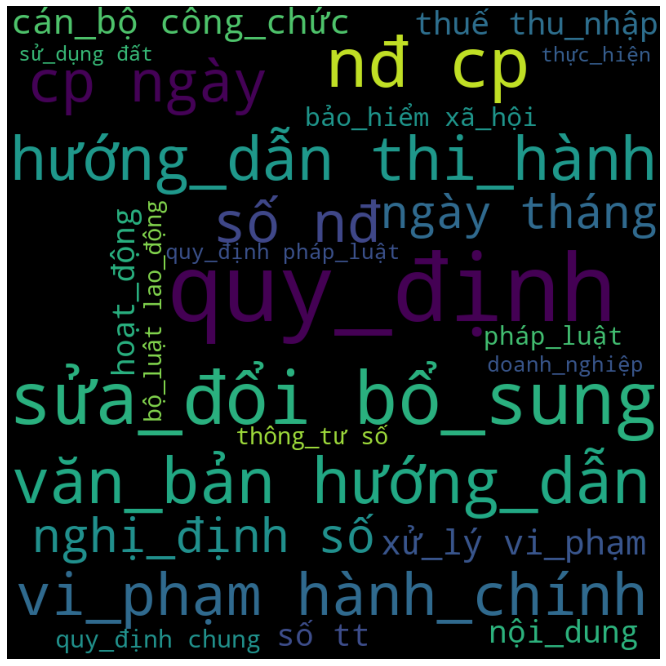

In [18]:
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000, min_font_size=20).generate(str(data[np.where(data[:, 2] == 'phap-luat-1')][:, 1]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./images/word_distribution_2.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

**Nhận xét:** Ta nhận thấy rằng những quyển sách thuộc nhãn y-hoc có tần suất xuất hiện nhiều các từ như thực_phẩm, ung_thư, ... cũng như nhãn phap-luat-1 có những từ xuất hiện nhiều như quy_định, vi_phạm, ... Đó là những từ liên quan trực tiếp tới những lĩnh vực này. Vì vậy, ta hoàn toàn có thể sử dụng tần số xuất hiện của mỗi từ để phân loại xem văn bản đó thuộc nhãn nào.